In [1]:
%matplotlib widget
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np

In [55]:
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.swap(0,1)
qc.h(0)
qc.measure([0], [0])
qc.draw()

┌───┐   ┌───┐┌─┐
q_0: ┤ H ├─X─┤ H ├┤M├
     ├───┤ │ └───┘└╥┘
q_1: ┤ X ├─X───────╫─
     └───┘         ║ 
c: 1/══════════════╩═
                   0

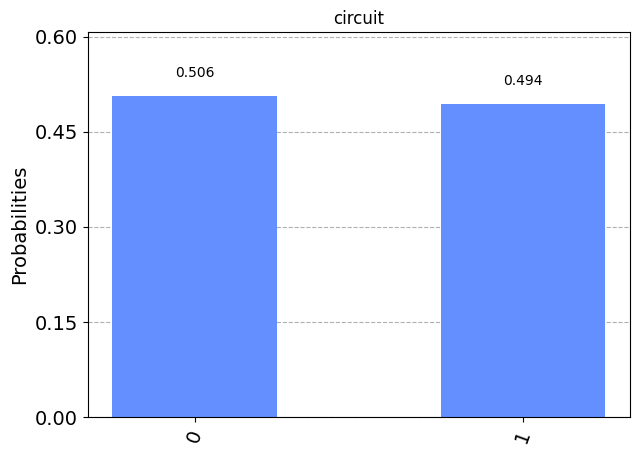

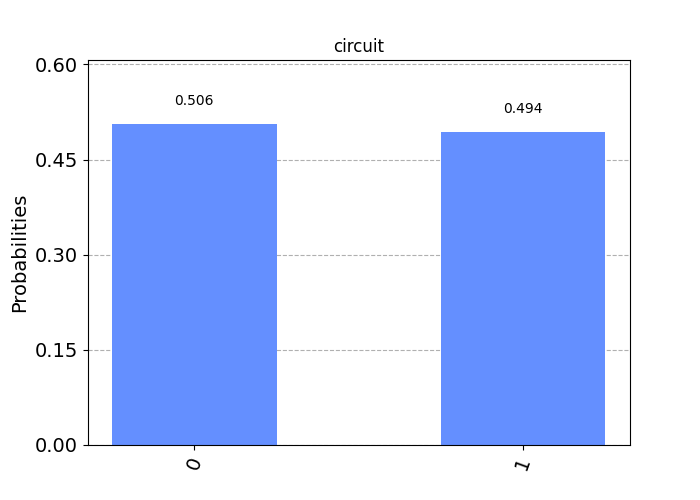

In [56]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
cicircuitrc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='circuit')

In [59]:
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = FakeVigo()
backend.configuration().basis_gates
backend.configuration().basis_gates = ['id', 'rx','ry', 'swap']
new_circ_lv0 = transpile(qc, backend=backend, optimization_level=0)
# plot_circuit_layout(new_circ_lv0, backend)
new_circ_lv0.draw()

global phase: 3π/2
               ┌─────────┐┌───────┐   ┌─────────┐┌───────┐┌─┐
      q_0 -> 0 ┤ Ry(π/2) ├┤ Rx(π) ├─X─┤ Ry(π/2) ├┤ Rx(π) ├┤M├
               └┬───────┬┘└───────┘ │ └─────────┘└───────┘└╥┘
      q_1 -> 1 ─┤ Rx(π) ├───────────X──────────────────────╫─
                └───────┘                                  ║ 
ancilla_0 -> 2 ────────────────────────────────────────────╫─
                                                           ║ 
ancilla_1 -> 3 ────────────────────────────────────────────╫─
                                                           ║ 
ancilla_2 -> 4 ────────────────────────────────────────────╫─
                                                           ║ 
          c: 1/════════════════════════════════════════════╩═
                                                           0

In [60]:
qasm_str = new_circ_lv0.qasm()
print(new_circ_lv0.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[1];
ry(pi/2) q[0];
rx(pi) q[0];
rx(pi) q[1];
swap q[0],q[1];
ry(pi/2) q[0];
rx(pi) q[0];
measure q[0] -> c[0];



In [61]:
from qutip.qip.qasm import read_qasm
qc = read_qasm(qc.qasm(), strmode=True)

SyntaxError: QASM: swap is not a valid QASM command. (<string>)

In [24]:
from HaPiCodes.simulation import basicSimulatePulse as bsp
from HaPiCodes.test_examples import msmtInfoSel
from HaPiCodes.data_process import fittingAndDataProcess as f
import yaml
yamlFile = msmtInfoSel.cwYaml
msmtInfoDict = yaml.safe_load(open(yamlFile, 'r'))
f.yamlFile = yamlFile

In [25]:
WQ = bsp.BasicExperiments(msmtInfoDict)
W, Q = WQ.generateFromCircuit(qc)
WQ.generateDrivePulse()
res = WQ.simulate()

Gate(SNOT, targets=[0], controls=None, classical controls=None, control_value=None)
Gate(X, targets=[1], controls=None, classical controls=None, control_value=None)
Gate(CNOT, targets=[1], controls=[0], classical controls=None, control_value=None)
Gate(SNOT, targets=[0], controls=None, classical controls=None, control_value=None)
Measurement(M, target=[0], classical_store=0)
Total run time:   0.06s


ValueError: max() arg is an empty sequence

In [ ]:
%run S001_piPulseTuneUp.py

10.0%. Run time:   2.02s. Est. time left: 00:00:00:18
20.0%. Run time:   3.40s. Est. time left: 00:00:00:13
30.0%. Run time:   5.16s. Est. time left: 00:00:00:12
40.0%. Run time:   6.50s. Est. time left: 00:00:00:09
50.0%. Run time:   7.80s. Est. time left: 00:00:00:07
60.0%. Run time:   9.20s. Est. time left: 00:00:00:06
70.0%. Run time:  10.83s. Est. time left: 00:00:00:04
80.0%. Run time:  12.25s. Est. time left: 00:00:00:03
90.0%. Run time:  13.90s. Est. time left: 00:00:00:01
100.0%. Run time:  15.51s. Est. time left: 00:00:00:00
Total run time:  15.52s
The rotation angle is 0.0 pi
Pi pulse amp is  0.1288957358306925 V
The Excited State DAC is 1.01
The Ground State DAC is 0.01
info successly stored


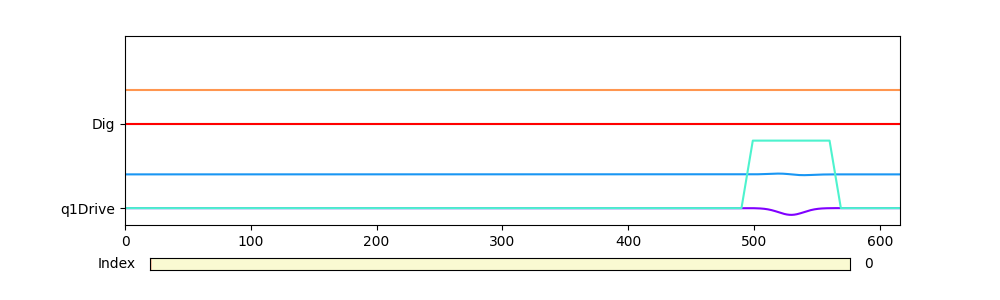

In [ ]:
WQ.plot(1)